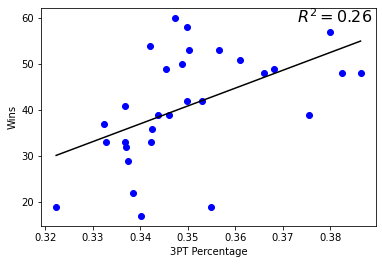

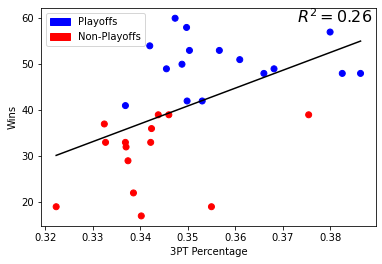

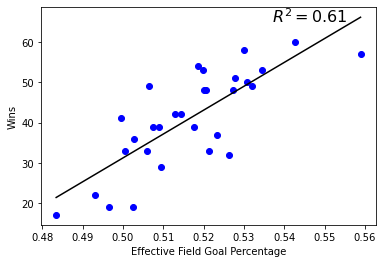

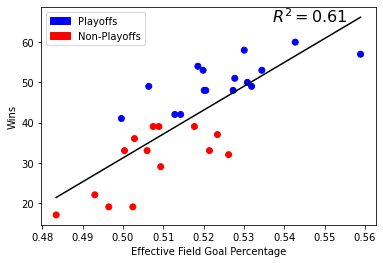

In [21]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

stats_18_19 = pd.read_csv('../../python_project_csv_files/2018-19_pbp.csv', header = [0])
pd.set_option("display.max_columns", None)

stats_18_19.fillna('',inplace=True)
stats_18_19['Play'] = stats_18_19["VISITORDESCRIPTION"] + stats_18_19["HOMEDESCRIPTION"]

stats_18_19['Play'] = stats_18_19['Play'].apply(lambda row: row if re.findall("\d'",row) != [] else np.nan)
stats_18_19.dropna(subset=['Play'],inplace=True)
stats_18_19['ShotDist'] = stats_18_19['Play'].apply(lambda row: re.findall("\d+'",row)[0][0:2] if len(re.findall("\d+'",row)[0]) == 3 else re.findall("\d+'",row)[0][0:1]).astype(int)
stats_18_19['ShotOutcome'] = stats_18_19['Play'].apply(lambda row: 'miss' if 'MISS' in row else 'make')
stats_18_19['ShotType'] = stats_18_19['Play'].apply(lambda row: '3PT' if '3PT' in row else '2PT')
stats_18_19['Team'] = stats_18_19['PLAYER1_TEAM_ABBREVIATION']
stats_18_19 = stats_18_19[['Team','ShotType','ShotDist','ShotOutcome']]

fg_perc = stats_18_19.groupby(['ShotType','ShotDist']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome'])))
team_fg_perc = stats_18_19.groupby(['Team','ShotType']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome']))).reset_index(name='fg_percent')
team_efg_perc = stats_18_19.groupby('Team').apply(lambda row: (sum((row['ShotOutcome']=='make') & (row['ShotType']=='2PT'))+1.5*sum((row['ShotOutcome']=='make') & (row['ShotType']=='3PT')))/len(row['ShotOutcome'])).reset_index(name='efg_percent')
fg_perc_3pt = team_fg_perc[team_fg_perc['ShotType'] == '3PT']
wins_list = [29,42,49,39,22,19,33,54,41,57,53,48,48,37,33,39,60,36,33,17,49,42,51,19,53,39,48,58,50,32]
playoff_teams_colors_list = ['r','b','b','r','r','r','r','b','b','b','b','b','b','r','r','r','b','r','r','r','b','b','b','r','b','r','b','b','b','r']

def scatter_trend_line(x,y,x_loc_label,y_loc_label,colors):
    
    plt.scatter(x, y,color=colors)

    # determine best fit line
    par = np.polyfit(x, y, 1, full=True)

    slope=par[0][0]
    intercept=par[0][1]
    xl = [min(x), max(x)]
    yl = [slope*xx + intercept  for xx in xl]

    # coefficient of determination, plot text
    variance = np.var(y)
    residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(x,y)])
    Rsqr = np.round(1-residuals/variance, decimals=2)
    plt.text(x_loc_label,y_loc_label,'$R^2 = %0.2f$'% Rsqr, fontsize=16)
    plt.plot(xl, yl, '-k')
    plt.ylabel('Wins')
    
plot1 = plt.figure(1)
scatter_trend_line(fg_perc_3pt['fg_percent'],wins_list,.373,59,'b')
plt.xlabel('3PT Percentage')
plt.savefig('wins_vs_3pt_percentage_by_team.pdf')

plot2 = plt.figure(2)
scatter_trend_line(fg_perc_3pt['fg_percent'],wins_list,.373,59,playoff_teams_colors_list)
plt.xlabel('3PT Percentage')
blue_patch = mpatches.Patch(color='b', label='Playoffs')
red_patch = mpatches.Patch(color='r', label='Non-Playoffs')
plt.legend(handles=[blue_patch,red_patch],loc='upper left')
plt.savefig('wins_vs_3pt_percentage_playoff_teams.pdf')


plot3 = plt.figure(3)
scatter_trend_line(team_efg_perc['efg_percent'],wins_list,.537,65,'b')
plt.xlabel('Effective Field Goal Percentage')
plt.savefig('wins_vs_effective_field_goal_percentage_by_team.pdf')

plot4 = plt.figure(4)
scatter_trend_line(team_efg_perc['efg_percent'],wins_list,.537,65,playoff_teams_colors_list)
plt.xlabel('Effective Field Goal Percentage')
blue_patch = mpatches.Patch(color='b', label='Playoffs')
red_patch = mpatches.Patch(color='r', label='Non-Playoffs')
plt.legend(handles=[blue_patch,red_patch],loc='upper left')
plt.savefig('wins_vs_effective_field_goal_percentage_playoff_teams.pdf')